In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\100346\OneDrive - Pantaleon. S.A\Desktop\DataScience\Color Azucar NI\DatasetUnificadoFinal.csv')
df.columns[df.isna().any()].tolist()

[]

In [3]:
df = df.fillna(df.mean())
df.head()

,Zafra,Semana,Lote,Pureza Jugo Primario &00030002,pH Jugo Primario &00040002,Azúcares Reductores Jugo Primario &00050002,pH Jugo Diluido &00040003,Azúcares Reductores Jugo Diluido &00050003,Sólidos Insolubles Jugo Diluido &00060003,Pol proceso Jugo Diluido &00590003,...,Caida pza Jp-Me,Caida pza Jd-Me,Caida glucobrix JP-Jd,Caida glucobrix Jd-Jc,Caida glucobrix Jc-me,Caida glucobrix me-mc,Caida Pz Masa a(Masa A-Miel A,Caida Pz Masa B(Masa B-Miel B,Caida Pz masa C(masa C-Miel Final,Blanco Especial <150UI (color)
0,2019,3,18,85.2106,5.1700,0.933,6.6142,0.984,2.5300,12.6062,...,1.3625,0.4320,-1.4351,1.4950,1.4837,-0.4464,14.2897,21.7080,26.3762,133.3130
1,2019,3,19,85.5055,5.3117,1.025,6.5958,1.000,1.6400,12.6209,...,1.8022,0.6753,-1.1643,1.2483,1.3992,-0.4147,16.0718,19.9673,26.6636,143.0093
2,2019,3,20,85.3337,5.2467,0.947,6.5408,0.912,1.5200,12.2490,...,1.0030,-0.0005,-0.9497,1.7803,0.6215,-0.1642,16.2352,19.6971,26.9168,127.2638
3,2019,4,21,85.5517,5.3108,0.954,6.6892,0.899,1.1115,12.4506,...,1.2077,0.0664,-0.7503,2.0893,-0.3326,-0.1779,18.4583,21.1442,27.6902,128.1569
4,2019,4,22,85.0769,5.3410,1.202,6.4460,1.225,1.2600,11.8549,...,-0.3659,-1.2036,-1.6521,4.1149,0.6776,-0.8255,15.5785,19.4269,28.2605,122.8739


<AxesSubplot:xlabel='Blanco Especial <150UI (color)', ylabel='Count'>

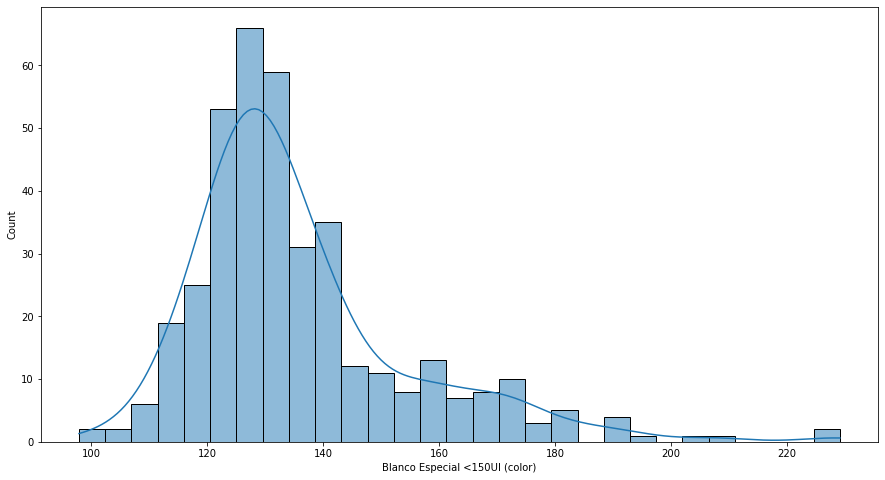

In [4]:
plt.figure(figsize=(15,8))
sns.histplot(data=df, x="Blanco Especial <150UI (color)", kde=True)

### Y ~ X

In [5]:
# Features and Target
X = df.iloc[:,:-1]
y = df.iloc[:,226]
X

,Zafra,Semana,Lote,Pureza Jugo Primario &00030002,pH Jugo Primario &00040002,Azúcares Reductores Jugo Primario &00050002,pH Jugo Diluido &00040003,Azúcares Reductores Jugo Diluido &00050003,Sólidos Insolubles Jugo Diluido &00060003,Pol proceso Jugo Diluido &00590003,...,Caida de pza jc-jf,Caida pza Jp-Me,Caida pza Jd-Me,Caida glucobrix JP-Jd,Caida glucobrix Jd-Jc,Caida glucobrix Jc-me,Caida glucobrix me-mc,Caida Pz Masa a(Masa A-Miel A,Caida Pz Masa B(Masa B-Miel B,Caida Pz masa C(masa C-Miel Final
0,2019,3,18,85.2106,5.1700,0.933,6.6142,0.984,2.5300,12.6062,...,-0.4759,1.3625,0.4320,-1.4351,1.4950,1.4837,-0.4464,14.2897,21.7080,26.3762
1,2019,3,19,85.5055,5.3117,1.025,6.5958,1.000,1.6400,12.6209,...,0.9582,1.8022,0.6753,-1.1643,1.2483,1.3992,-0.4147,16.0718,19.9673,26.6636
2,2019,3,20,85.3337,5.2467,0.947,6.5408,0.912,1.5200,12.2490,...,-0.9403,1.0030,-0.0005,-0.9497,1.7803,0.6215,-0.1642,16.2352,19.6971,26.9168
3,2019,4,21,85.5517,5.3108,0.954,6.6892,0.899,1.1115,12.4506,...,0.5604,1.2077,0.0664,-0.7503,2.0893,-0.3326,-0.1779,18.4583,21.1442,27.6902
4,2019,4,22,85.0769,5.3410,1.202,6.4460,1.225,1.2600,11.8549,...,0.0153,-0.3659,-1.2036,-1.6521,4.1149,0.6776,-0.8255,15.5785,19.4269,28.2605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,2023,8,51,85.6948,5.2692,1.179,6.9083,1.033,1.6040,12.0837,...,-0.0349,2.1014,0.9818,-0.4302,-0.7355,3.3833,0.0267,15.2558,17.8155,29.8293
380,2023,8,52,85.5958,5.2892,1.374,7.0167,1.168,1.9000,11.9383,...,2.0187,2.1872,1.4965,-0.3871,-0.4054,2.9644,0.6381,15.9575,18.7095,27.3921
381,2023,8,53,84.9152,5.2164,1.389,6.8118,1.147,2.1150,11.5956,...,2.8043,1.1993,0.4338,-0.2215,0.2138,2.6285,0.2249,14.9915,18.9856,28.6236
382,2023,9,54,85.3853,5.2573,1.042,6.7773,1.168,1.3220,11.8970,...,1.0423,0.4195,-0.3198,-2.2326,8.2965,-4.9616,-0.3520,17.3780,19.3951,30.3679


In [6]:
# Drop Columns In Dataset
X.drop(columns=['Zafra ', 'Semana'],inplace=True)
X.drop(columns=['Materia insoluble Azúcar Blanco Local &00240039', 'Tamaño de grano CV Azúcar Blanco Local &00440039'],inplace=True)
X.drop(columns=['Cenizas Azúcar Blanco Especial &00170456', 'Azúcar Blanco Total (color)'],inplace=True)
X.drop(columns=['Azúcar Blanco Total (humedad)', 'Azúcar Blanco Total (pol)'],inplace=True)
X.drop(columns=['Azúcar Blanco Total (sacos)', 'Azúcar en proceso (sacos)'],inplace=True)
X.drop(columns=['Blanco Especial <150UI (humedad)', 'Blanco Especial <150UI (pol)'],inplace=True)
X.drop(columns=['Blanco Especial <150UI (sacos)', 'Blanco Local  (humedad)'],inplace=True)
X.drop(columns=['Blanco Local (color)', 'Blanco Local (pol)'],inplace=True)
X.drop(columns=['Blanco Local (sacos)', 'Blanco Local con Vitamina (color)'],inplace=True)
X.drop(columns=['Blanco Local con vitamina (humedad)', 'Blanco Local con Vitamina (pol)'],inplace=True)
X.drop(columns=['Blanco Local con Vitamina (sacos)', 'Compra Eléctrica (MWh)'],inplace=True)
X.drop(columns=['Consumo Auxiliares (MWh) ', 'Consumo de Vapor (%)'],inplace=True)
X.drop(columns=['Consumo Fábrica (kWh/t)', 'Consumo Fábrica (MWh)'],inplace=True)
X.drop(columns=['Consumo Total (MWh)', 'Crudo Total (color)'],inplace=True)
X.drop(columns=['Crudo Total (humedad)', 'Crudo Total (pol)'],inplace=True)
X.drop(columns=['Crudo Total (sacos)', 'HTM (Bx)'],inplace=True)
X.drop(columns=['HTM (Glucobrix)', 'HTM (Pol)'],inplace=True)
X.drop(columns=['HTM (Pza)', 'HTM Azúcar equivalente (sacos)'],inplace=True)
X.drop(columns=['HTM Melaza equivalente (t)', 'HTM Producidas (t)'],inplace=True)
X.drop(columns=['Melaza Azúcares Reductores (%)', 'Melaza en Proceso (Pol)'],inplace=True)
X.drop(columns=['Melaza en Proceso (t)', 'Melaza en Proceso (t; 85 Bx)'],inplace=True)
X.drop(columns=['Melaza Física (t)', 'Melaza Producida (kg/t)'],inplace=True)
X.drop(columns=['Melaza Producida (t)', 'Melaza Producida 85 Bx (t)'],inplace=True)
X.drop(columns=['Melaza Sacarosa Real (%)', 'Miel Final (Brix)'],inplace=True)
X.drop(columns=['Miel Final (Glucobrix)', 'Miel Final (Pol)'],inplace=True)
X.drop(columns=['Miel Final (Pza)', 'Poder Calorico Base Humeda (GJ/t)'],inplace=True)
X.drop(columns=['Producción Bagazo (kWh/t)', 'Producción Condensación (MWh)'],inplace=True)
X.drop(columns=['Producción Escape (MWh)', 'Producción Total (MWh)'],inplace=True)
X.drop(columns=['Producción Total Bagazo (MWh)', 'Pureza Esperada de Melaza (%)'],inplace=True)
X.drop(columns=['Pureza Real de Melaza (%)', 'Total de Azúcar Físicos (sacos)'],inplace=True)
X.drop(columns=['Venta Bagazo Propio (kWh/t)', 'Venta Escape (MWh)'],inplace=True)
X.drop(columns=['Venta Total (MWh)', 'Vitamina A (kg / saco)'],inplace=True)
X


,Lote,Pureza Jugo Primario &00030002,pH Jugo Primario &00040002,Azúcares Reductores Jugo Primario &00050002,pH Jugo Diluido &00040003,Azúcares Reductores Jugo Diluido &00050003,Sólidos Insolubles Jugo Diluido &00060003,Pol proceso Jugo Diluido &00590003,pH Jugo Alcalizado &00040006,Pol proceso Jugo Alcalizado &00590006,...,Caida de pza jc-jf,Caida pza Jp-Me,Caida pza Jd-Me,Caida glucobrix JP-Jd,Caida glucobrix Jd-Jc,Caida glucobrix Jc-me,Caida glucobrix me-mc,Caida Pz Masa a(Masa A-Miel A,Caida Pz Masa B(Masa B-Miel B,Caida Pz masa C(masa C-Miel Final
0,18,85.2106,5.1700,0.933,6.6142,0.984,2.5300,12.6062,7.1392,12.0283,...,-0.4759,1.3625,0.4320,-1.4351,1.4950,1.4837,-0.4464,14.2897,21.7080,26.3762
1,19,85.5055,5.3117,1.025,6.5958,1.000,1.6400,12.6209,7.2383,12.1383,...,0.9582,1.8022,0.6753,-1.1643,1.2483,1.3992,-0.4147,16.0718,19.9673,26.6636
2,20,85.3337,5.2467,0.947,6.5408,0.912,1.5200,12.2490,6.9242,12.5333,...,-0.9403,1.0030,-0.0005,-0.9497,1.7803,0.6215,-0.1642,16.2352,19.6971,26.9168
3,21,85.5517,5.3108,0.954,6.6892,0.899,1.1115,12.4506,7.1892,12.2917,...,0.5604,1.2077,0.0664,-0.7503,2.0893,-0.3326,-0.1779,18.4583,21.1442,27.6902
4,22,85.0769,5.3410,1.202,6.4460,1.225,1.2600,11.8549,6.9130,11.3740,...,0.0153,-0.3659,-1.2036,-1.6521,4.1149,0.6776,-0.8255,15.5785,19.4269,28.2605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,51,85.6948,5.2692,1.179,6.9083,1.033,1.6040,12.0837,7.0417,11.9967,...,-0.0349,2.1014,0.9818,-0.4302,-0.7355,3.3833,0.0267,15.2558,17.8155,29.8293
380,52,85.5958,5.2892,1.374,7.0167,1.168,1.9000,11.9383,7.2017,11.9767,...,2.0187,2.1872,1.4965,-0.3871,-0.4054,2.9644,0.6381,15.9575,18.7095,27.3921
381,53,84.9152,5.2164,1.389,6.8118,1.147,2.1150,11.5956,7.0491,11.6683,...,2.8043,1.1993,0.4338,-0.2215,0.2138,2.6285,0.2249,14.9915,18.9856,28.6236
382,54,85.3853,5.2573,1.042,6.7773,1.168,1.3220,11.8970,7.0973,12.0617,...,1.0423,0.4195,-0.3198,-2.2326,8.2965,-4.9616,-0.3520,17.3780,19.3951,30.3679


#### Train - Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=501, shuffle=True)
X_train.columns

Index(['Lote', 'Pureza Jugo Primario &00030002', 'pH Jugo Primario &00040002',
       'Azúcares Reductores Jugo Primario &00050002',
       'pH Jugo Diluido &00040003',
       'Azúcares Reductores Jugo Diluido &00050003',
       'Sólidos Insolubles Jugo Diluido &00060003',
       'Pol proceso Jugo Diluido &00590003', 'pH Jugo Alcalizado &00040006',
       'Pol proceso Jugo Alcalizado &00590006',
       ...
       'Caida de pza jc-jf', 'Caida pza Jp-Me', 'Caida pza Jd-Me',
       'Caida glucobrix JP-Jd', 'Caida glucobrix Jd-Jc',
       'Caida glucobrix Jc-me', 'Caida glucobrix me-mc',
       'Caida Pz Masa a(Masa A-Miel A', 'Caida Pz Masa B(Masa B-Miel B',
       'Caida Pz masa C(masa C-Miel Final'],
      dtype='object', length=162)

#### K-Feature Selection

In [8]:
select = SelectKBest(score_func=mutual_info_regression,k=30)
X_train_kbest = select.fit_transform(X_train,y_train)
X_test_kbest = select.transform(X_test)
select.get_feature_names_out()

array(['Lote', 'Pureza Jugo Primario &00030002',
       'Pol proceso Jugo Alcalizado &00590006',
       'Pureza Masa Primera Tacho Convencional &00030013',
       'Kg/t Pol caña core sampler', 'Brix Core Sampler &00610001',
       'Pol Core Sampler &00770001', 'Brix Core Sampler HF',
       'Pol Core Sampler HF', 'Cal (kg / t caña)',
       'Extracción de sacarosa (%)', 'Floculante jugo (mg / kg caña)',
       'Floculante meladura (mg / saco)', 'Jugo Clarificado (pH)', 'ç',
       'Jugo Diluído (pza)', 'Jugo Filtrado (Pza)',
       'Jugo Primario (brix)', 'Jugo Primario (pol)',
       'Jugo Primario (pzal)', 'Jugo Residual (pol)', 'Masa C (% caña)',
       'Masa C (Pza)', 'Meladura (brix)', 'Meladura Clarificada (pH)',
       'Meladura Clarificada (pza)', 'Pérdida en bagazo (%)',
       'Pol en Bagazo (%)', 'Tensoactivo (mg / kg caña)',
       ' pza jufiltrado'], dtype=object)

#### Correlation Matrix

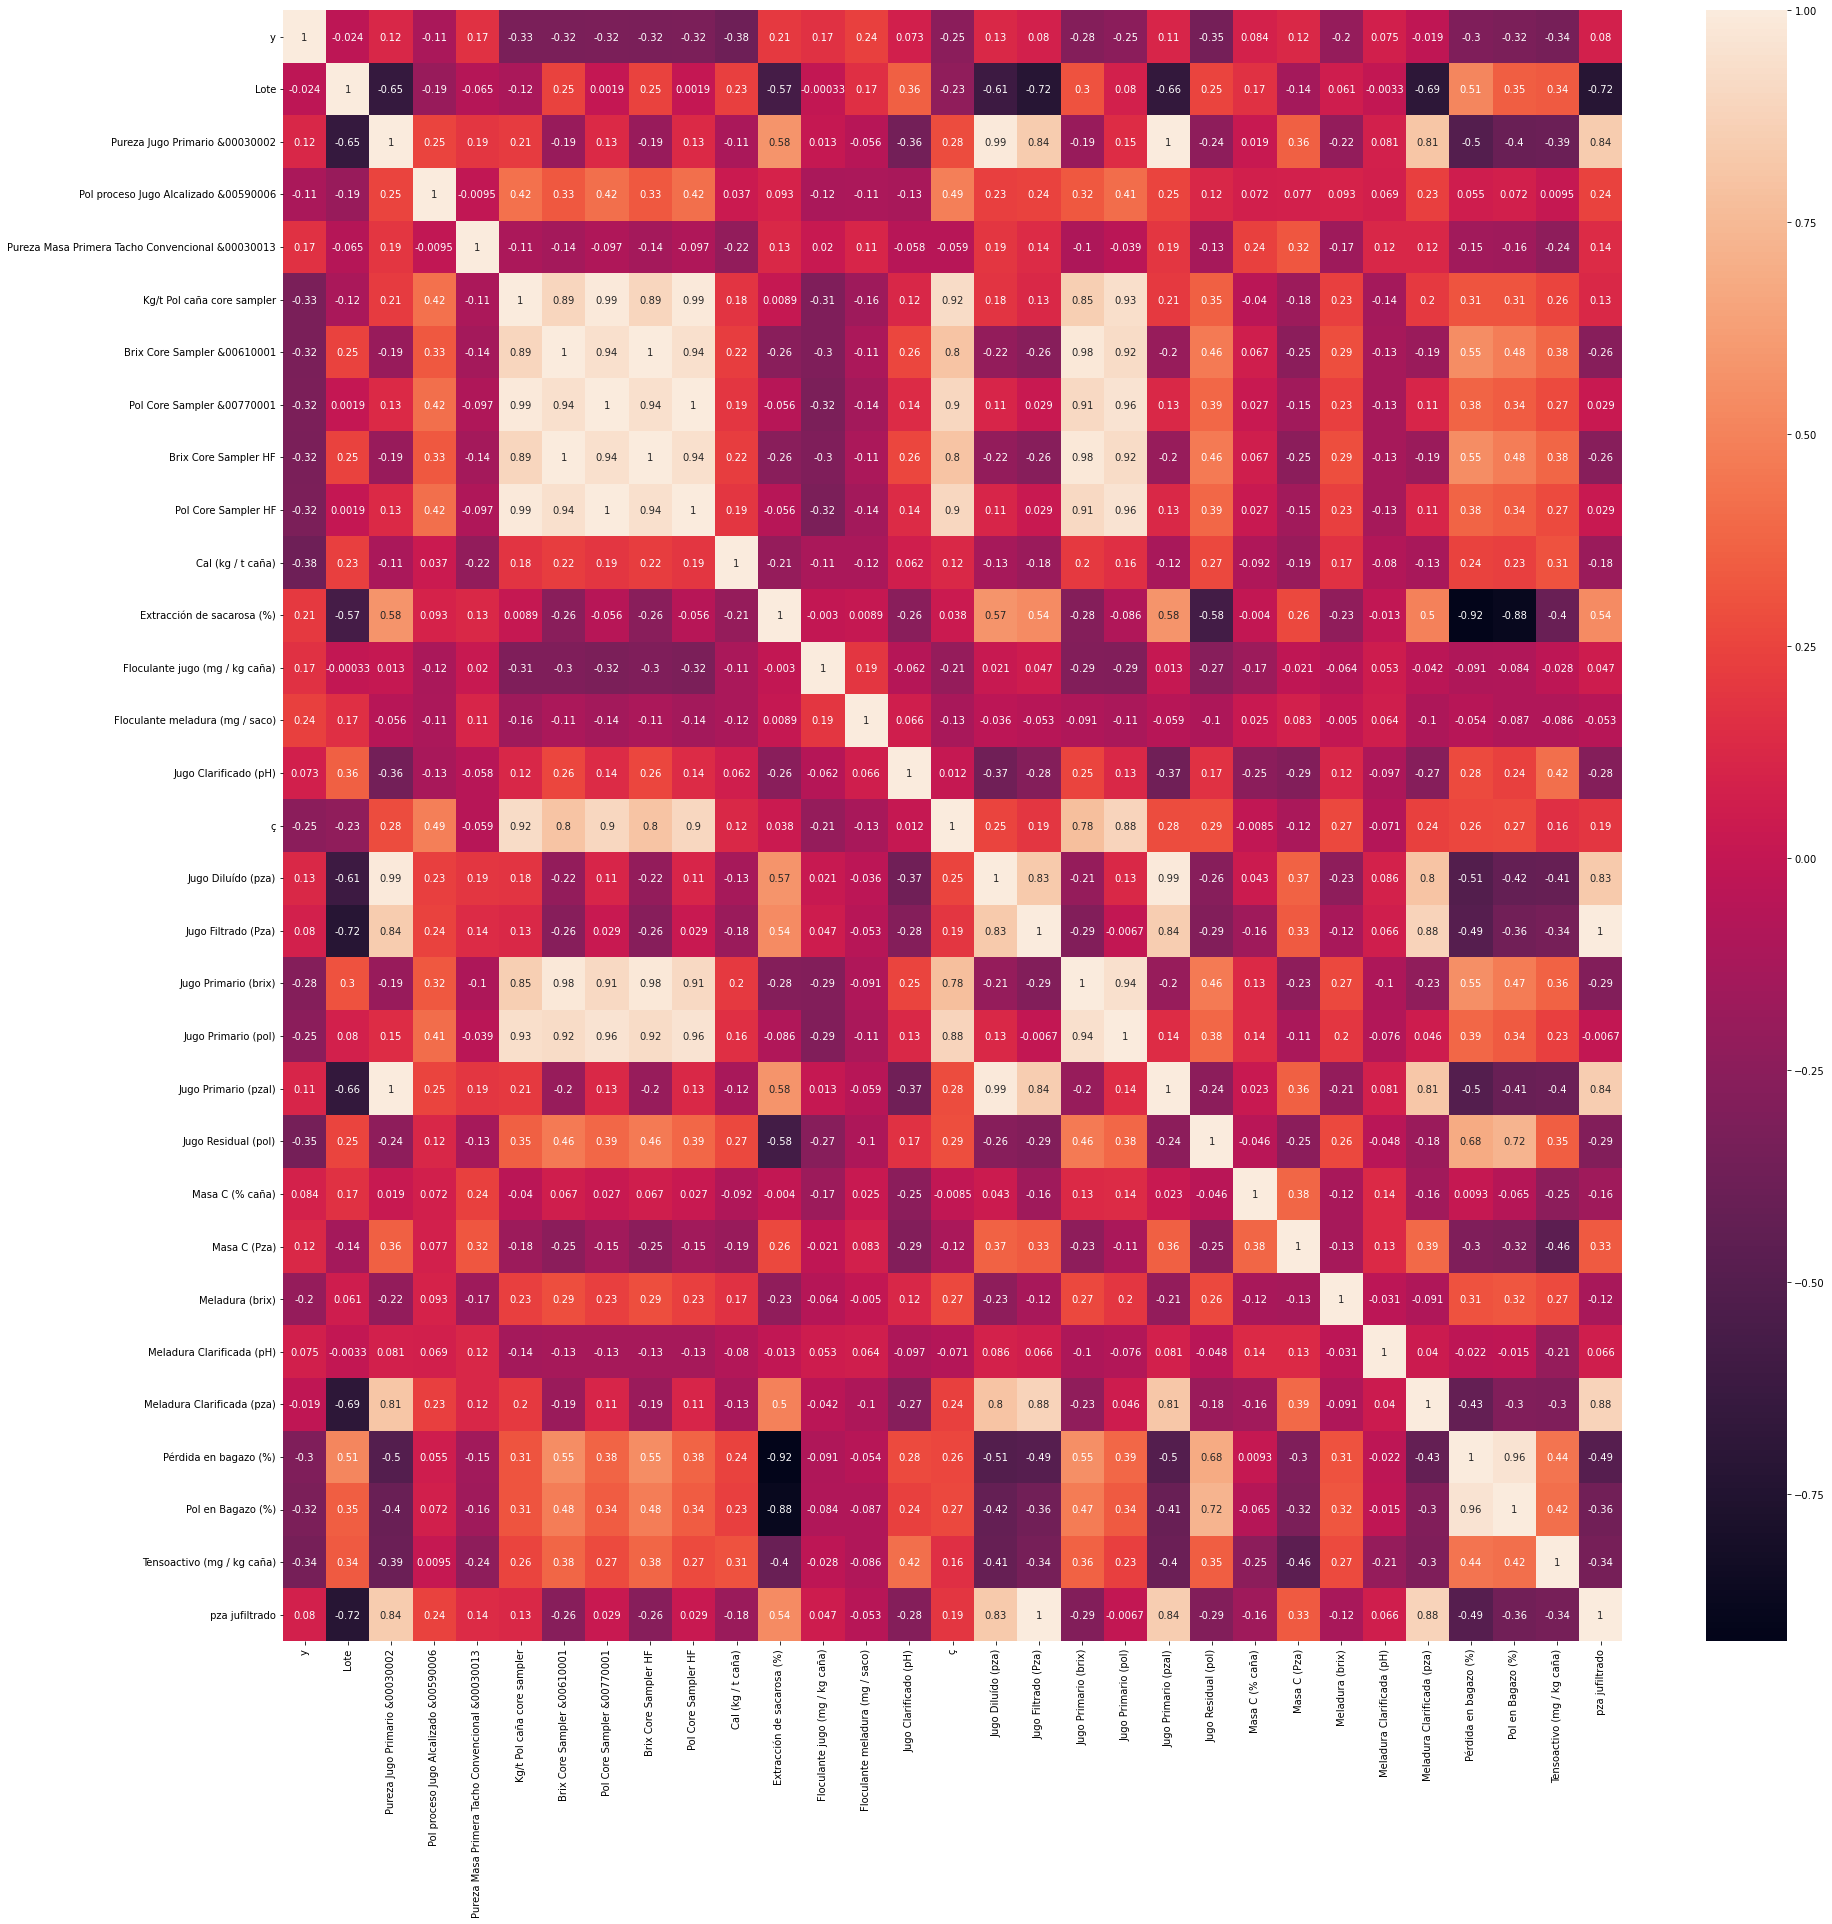

In [9]:
df = pd.DataFrame(data = X_train_kbest,  
                  columns = select.get_feature_names_out())

y = y_train.reset_index()
df['y']=y.drop(['index'],axis=1)
df.insert(0,'y',df.pop('y'))

#plotting the heatmap for correlation
fig, ax = plt.subplots(figsize=(30,30))
ax = sns.heatmap(df.corr(), annot=True)

In [10]:
X_train_kbest.shape

(288, 30)

#### Performance functions

In [11]:
def performance(estimator,X_tr,y_tr,X_ts,y_ts):
    
    # Train Predictions
    train_prediction = estimator.predict(X_tr.values)
    mse_train = mean_squared_error(y_tr.values, train_prediction)
    rmse_train = mse_train**.5
    print("Train RMSE:",rmse_train)

    # Test Predictions
    test_prediction = estimator.predict(X_ts.values)
    mse_test = mean_squared_error(y_ts.values, test_prediction)
    rmse_test = mse_test**.5
    print("Test RMSE:",rmse_test)

    # Performance
    plt.figure(figsize=(15,8))
    plt.scatter(train_prediction, y_tr.values, color = 'green')
    plt.scatter(test_prediction, y_ts.values, color = 'red')
    plt.plot(y_train.values, y_train.values, color = 'blue')
    plt.title('Regression Predictions')
    plt.xlabel('Prediction')
    plt.ylabel('True Values')
    plt.show() 
    
    # Permutation Feature Importance
    r = permutation_importance(estimator.best_estimator_, X_ts.values, y_ts.values, n_repeats=30, random_state=0)
    sorted_idx = r.importances_mean.argsort()[::]
    X_sorted = X_tr.iloc[:,sorted_idx[-10:]]
    feature_names = list(X_sorted.columns.values)
    plt.figure(figsize=(15,15))
    plt.barh(feature_names, r.importances_mean[sorted_idx[-10:]])
    plt.title("Permutation Feature Importance")

### Random Forest Regressor Training

In [12]:
param_grid = {
    'max_depth': [20,30],
    'max_features' : [20,30],
    'n_estimators': [175,200]}

rf_best_model = GridSearchCV(estimator=RandomForestRegressor(), 
param_grid=param_grid,cv=RepeatedKFold(n_splits=10, n_repeats=5, random_state=1), scoring = "r2", verbose = 1)

rf_best_model.fit(X_train_kbest, y_train.values)

print(rf_best_model.best_score_)
print(rf_best_model.scorer_)

rf_best_model.best_estimator_

Fitting 50 folds for each of 8 candidates, totalling 400 fits
0.3877150371602252
make_scorer(r2_score)


RandomForestRegressor(max_depth=30, max_features=20, n_estimators=200)

### Random Forest Regression Performance

Train RMSE: 5.692512878509092
Test RMSE: 10.836034098641012


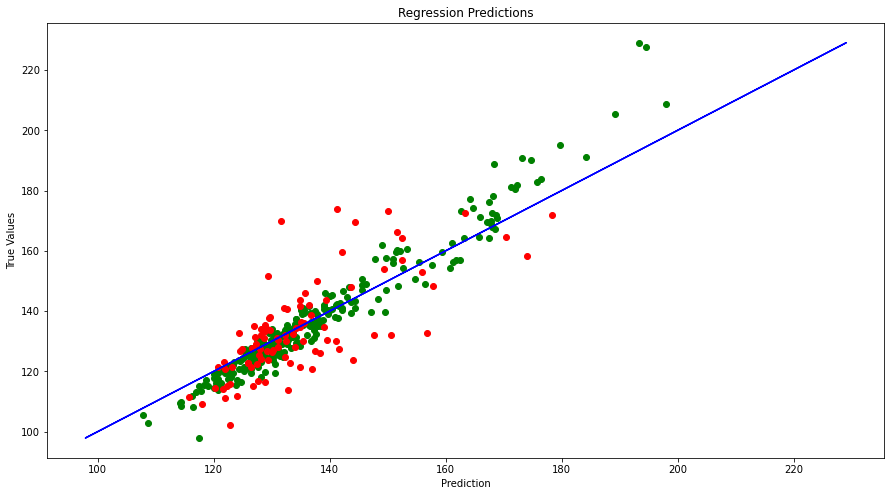

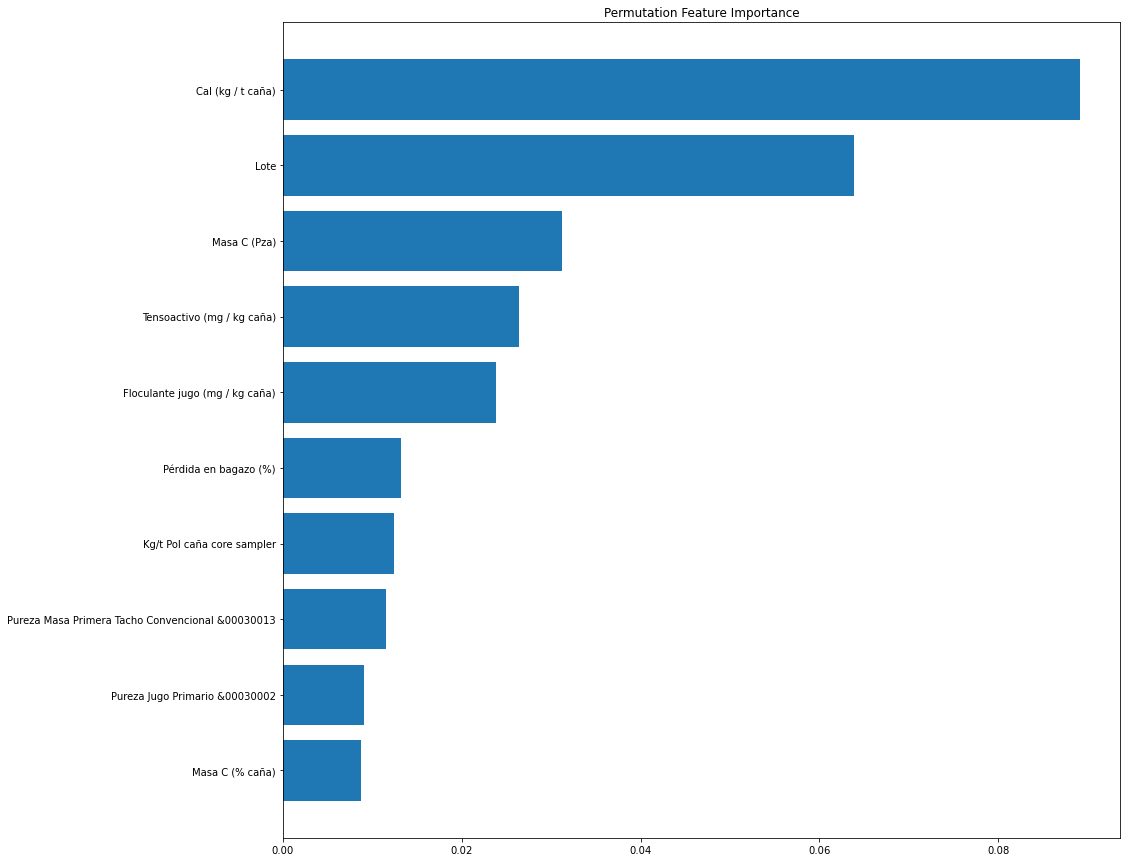

In [13]:
X_train_df = pd.DataFrame(data = X_train_kbest,  
                  columns = select.get_feature_names_out())
y_train_df = pd.DataFrame(data = y_train.values,
                    columns = ["Blanco Especial <150UI (color)"])

X_test_df = pd.DataFrame(data = X_test_kbest,  
                  columns = select.get_feature_names_out())
y_test_df = pd.DataFrame(data = y_test.values,
                    columns = ["Blanco Especial <150UI (color)"])


performance(rf_best_model,X_train_df,y_train_df,X_test_df,y_test_df)
#performance(rf_best_model,X_df,X_train_kbest,y_train,X_test_kbest,y_test)

In [ ]:
df
#plt.scatter(df['y'],df['Pol proceso Jugo Alcalizado &00590006'])


### SVM Regressor Training

In [70]:
param_grid = {
    'C' : [35,40,45],
    'epsilon' : [4.5,5,5.5],
    'gamma' : [1e-5,1e-4,1e-3]}

svr_best_model = GridSearchCV(estimator=SVR(kernel="rbf"), 
param_grid=param_grid,cv=RepeatedKFold(n_splits=10, n_repeats=5, random_state=1), scoring = "r2", verbose = 1)


svr_best_model.fit(X_train_kbest, y_train.values)

print(svr_best_model.best_score_)
print(svr_best_model.scorer_)

svr_best_model.best_estimator_

Fitting 50 folds for each of 27 candidates, totalling 1350 fits
0.1140431638534855
make_scorer(r2_score)


SVR(C=40, epsilon=5, gamma=0.0001)

Train RMSE: 15.28827526848198
Test RMSE: 14.38648394304432


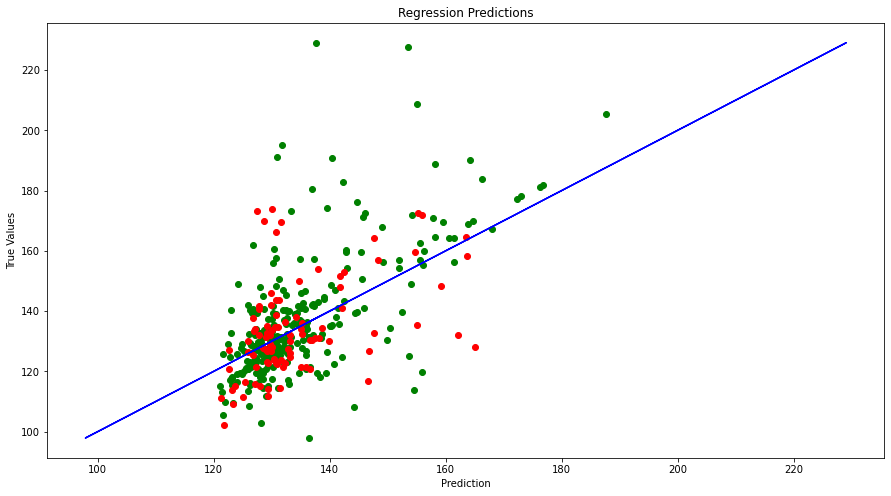

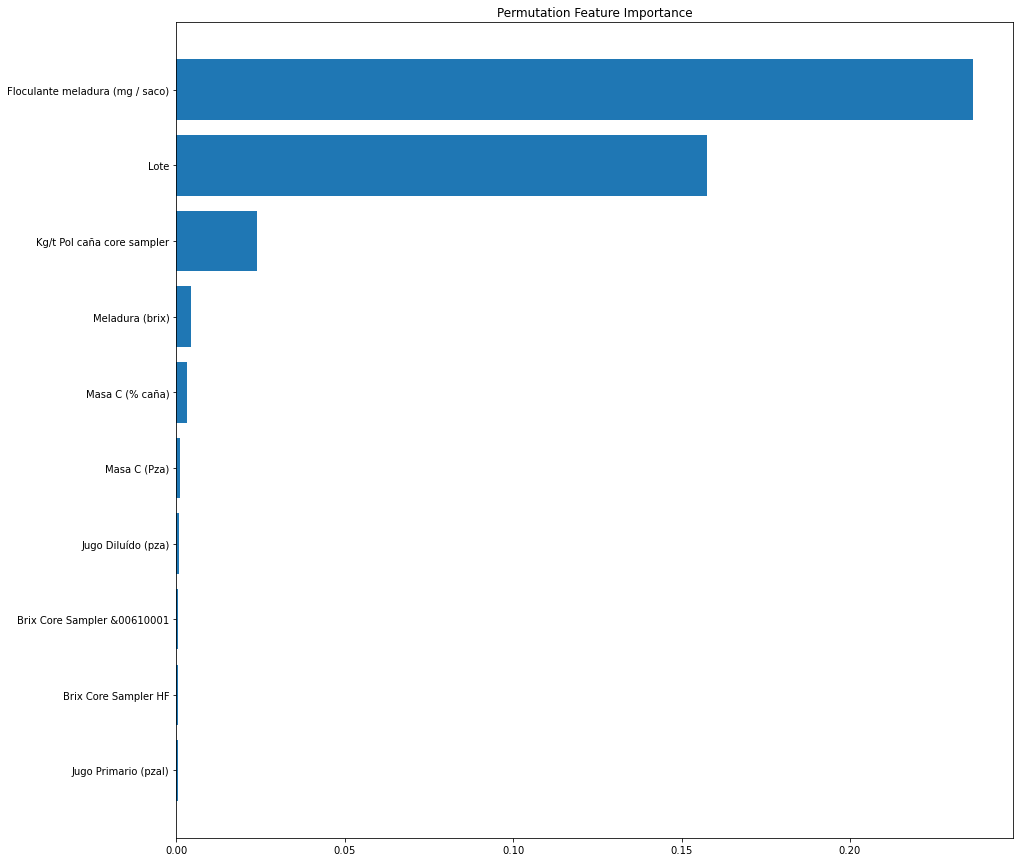

In [71]:
X_train_df = pd.DataFrame(data = X_train_kbest,  
                  columns = select.get_feature_names_out())
y_train_df = pd.DataFrame(data = y_train.values,
                    columns = ["Blanco Especial <150UI (color)"])

X_test_df = pd.DataFrame(data = X_test_kbest,  
                  columns = select.get_feature_names_out())
y_test_df = pd.DataFrame(data = y_test.values,
                    columns = ["Blanco Especial <150UI (color)"])

performance(svr_best_model,X_train_df,y_train_df,X_test_df,y_test_df)

### Gradient Boosting Regressor Training

In [33]:
param_grid = {
    'learning_rate': [0.02],
    'subsample'    : [ 0.5],
    'n_estimators' : [200,300],
    'max_depth'    : [3,5,6]}

gb_best_model = GridSearchCV(estimator=GradientBoostingRegressor(), 
param_grid=param_grid,cv=RepeatedKFold(n_splits=10, n_repeats=2, random_state=1), scoring = "r2", verbose = 1)


gb_best_model.fit(X_train_kbest, y_train.values)

print(gb_best_model.best_score_)
print(gb_best_model.scorer_)

gb_best_model.best_estimator_

Fitting 20 folds for each of 6 candidates, totalling 120 fits
0.4360975120880065
make_scorer(r2_score)


GradientBoostingRegressor(learning_rate=0.02, max_depth=6, n_estimators=300,
                          subsample=0.5)

Train RMSE: 2.1117075583698766
Test RMSE: 10.599527450615433


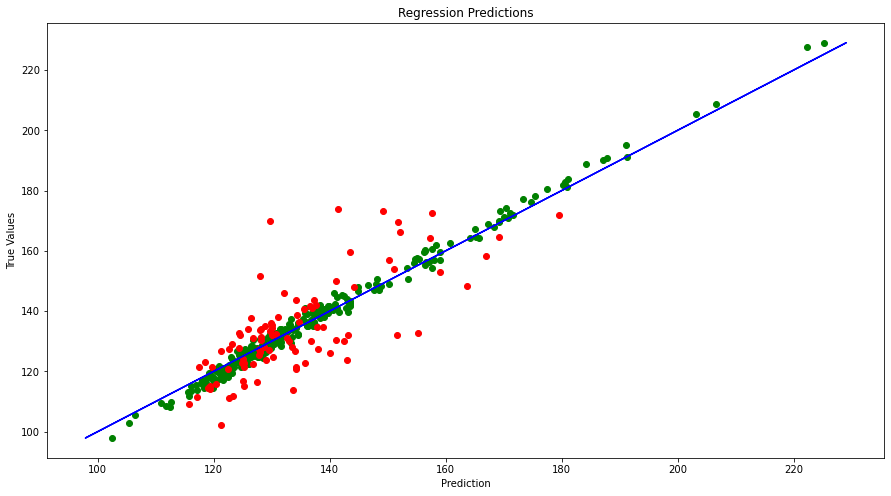

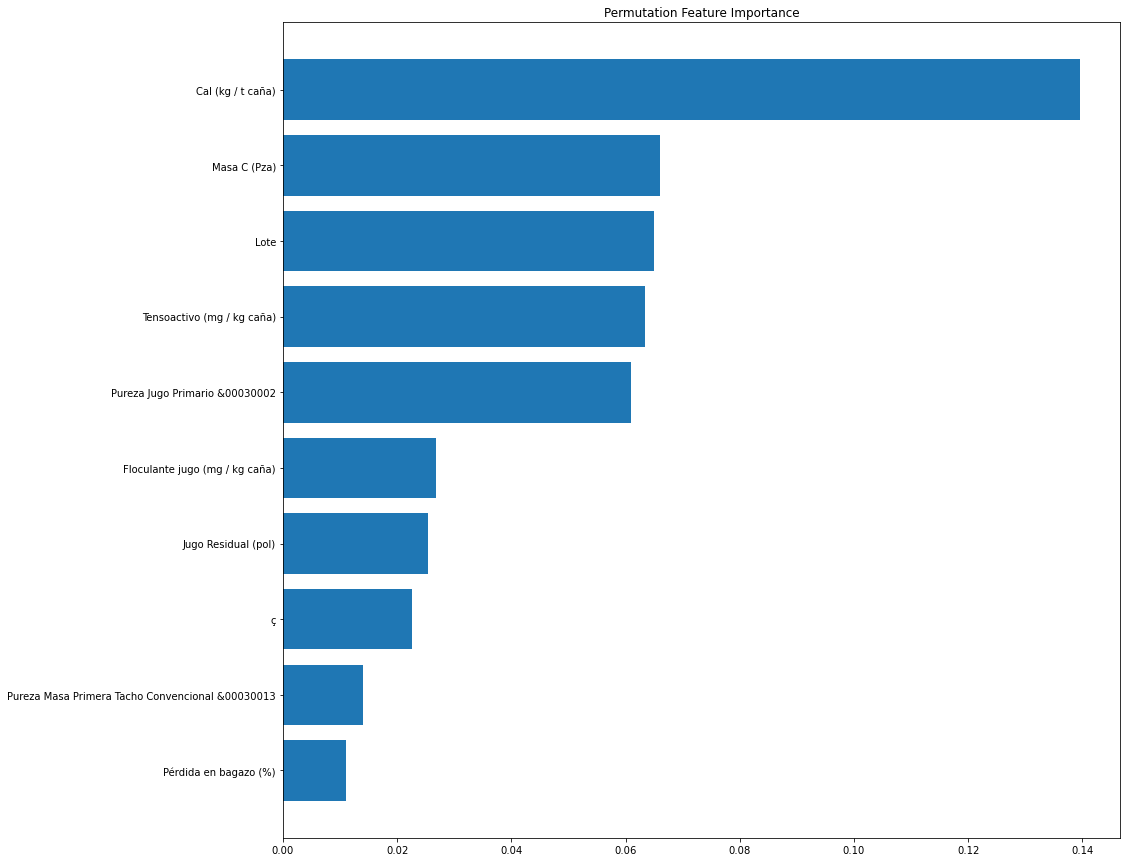

In [34]:
X_train_df = pd.DataFrame(data = X_train_kbest,  
                  columns = select.get_feature_names_out())
y_train_df = pd.DataFrame(data = y_train.values,
                    columns = ["Blanco Especial <150UI (color)"])

X_test_df = pd.DataFrame(data = X_test_kbest,  
                  columns = select.get_feature_names_out())
y_test_df = pd.DataFrame(data = y_test.values,
                    columns = ["Blanco Especial <150UI (color)"])

performance(gb_best_model,X_train_df,y_train_df,X_test_df,y_test_df)

Text(0.5, 1.0, 'Feature Importance (MDI)')

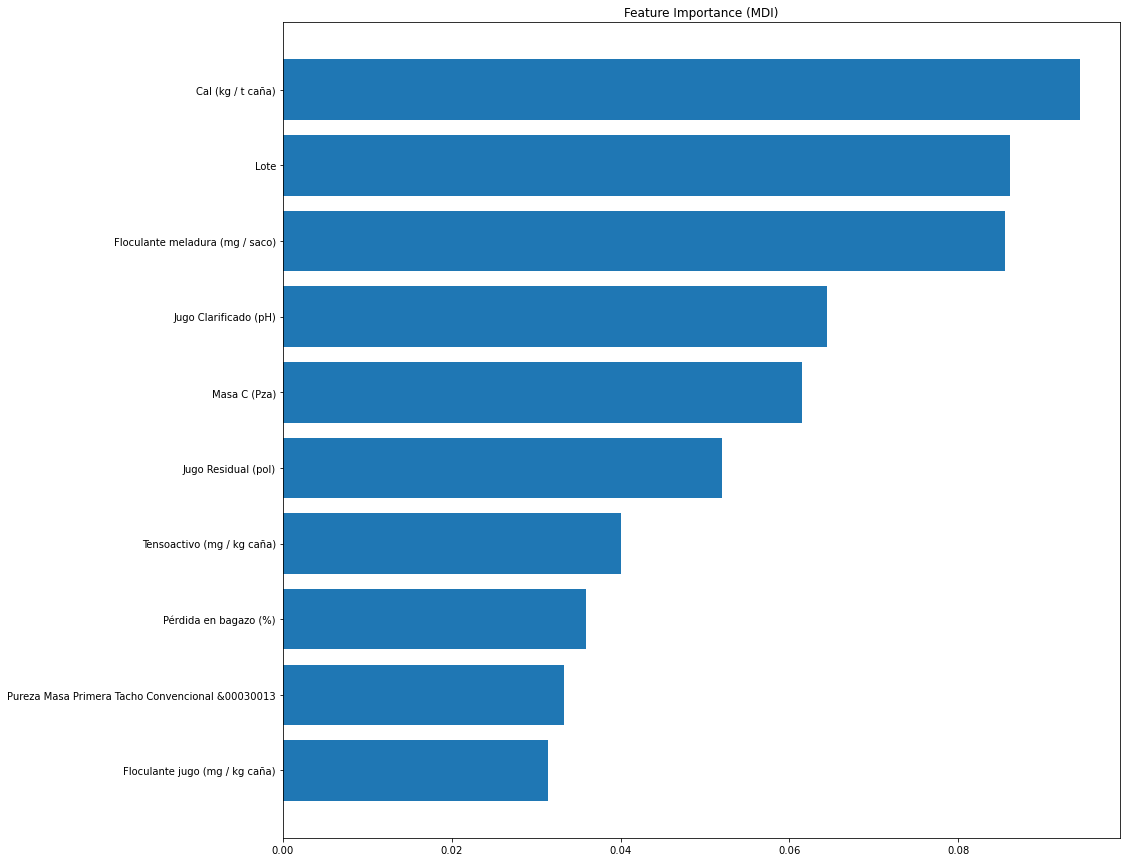

In [28]:
feature_importance = gb_best_model.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importance)[-10:]
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(15, 15))
plt.barh(pos, feature_importance[sorted_idx], align="center")
X_df = pd.DataFrame(data = X_train_kbest,  
                  columns = select.get_feature_names_out())
X_sorted = X_df.iloc[:,sorted_idx[-10:]]
feature_names = list(X_sorted.columns.values)
plt.yticks(pos, np.array(feature_names))
plt.title("Feature Importance (MDI)")

### Testing over Different Validation Sets (random_state)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=64, shuffle=True)

select = SelectKBest(score_func=mutual_info_regression,k=30)
X_train_kbest = select.fit_transform(X_train,y_train)
X_test_kbest = select.transform(X_test)


# Choose manually best estimator from Grid Search
rf_best_model = RandomForestRegressor(max_depth=20, max_features=20, n_estimators=175)
rf_best_model.fit(X_train_kbest, y_train)

# Train and Validation Scores
prediction_tr = rf_best_model.predict(X_train_kbest)
prediction_ts = rf_best_model.predict(X_test_kbest)
print("Train R2:",r2_score(y_train,prediction_tr))
print("Train RMSE:",np.sqrt(mean_squared_error(y_train, prediction_tr)))
print("Test R2:",r2_score(y_test,prediction_ts))
print("Test RMSE:",np.sqrt(mean_squared_error(y_test, prediction_ts)))

# Performance
plt.figure(figsize=(15,8))
plt.scatter(prediction_tr, y_train, color = 'green')
plt.scatter(prediction_ts, y_test, color = 'red')
plt.plot(y_train, y_train, color = 'blue')
plt.title('Regression Predictions')
plt.xlabel('Prediction')
plt.ylabel('True Values')
plt.show() 

# Permutation Feature Importance
r = permutation_importance(rf_best_model, X_test_kbest, y_test, n_repeats=30, random_state=0)
sorted_idx = r.importances_mean.argsort()[::]
X_df = pd.DataFrame(data = X_train_kbest,  
                  columns = select.get_feature_names_out())
X_sorted = X_df.iloc[:,sorted_idx[-10:]]
feature_names = list(X_sorted.columns.values)
plt.figure(figsize=(15,15))
plt.barh(feature_names, r.importances_mean[sorted_idx[-10:]])

